# Fake News Detector using BERT

In [1]:
!pip install tensorflow_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [3]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4

In [4]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd

In [62]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1"
encoder_url = "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-10-h-128-a-2/2"

In [63]:
preprocess_model = hub.KerasLayer(preprocess_url)
encoder_model = hub.KerasLayer(encoder_url)

Fake vs Real News dataset from https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download

In [26]:
df_true = pd.read_csv("True.csv")
df_true['is_legit'] = 1
df_true.drop('date', axis='columns', inplace=True)
df_true.head(10)

,title,text,subject,is_legit
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,1


In [27]:
df_fake = pd.read_csv("Fake.csv")
df_fake['is_legit'] = 0
df_fake.drop('date', axis='columns', inplace=True)
df_fake.head(10)

,title,text,subject,is_legit
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,0


In [29]:
print(df_true.size)
print(df_fake.size)

85668
93924


In [33]:
df_fake_downsampled = df_fake.sample(df_true.shape[0])
df_fake_downsampled.size

85668

In [35]:
df = pd.concat([df_true, df_fake_downsampled], ignore_index=True, sort=False)
df.size

171336

In [38]:
df.sample(10)

,title,text,subject,is_legit
15513,Egypt's Sisi says he will not seek a third ter...,CAIRO (Reuters) - Egypt s President Abdel Fatt...,worldnews,1
33402,SECRET DUMPS OF TOXIC WASTE ON PRIVATE PROPERT...,This story gets more and more unbelievable eve...,Government News,0
33426,WHERE WAS MEDIA OUTRAGE After This WOMAN DELIB...,The media has been giving wall-to-wall coverag...,left-news,0
37024,"MICHELLE, SASHA AND MALIA Will Join Barack On ...",The Obama s just added millions onto the taxpa...,left-news,0
2277,"Tillerson says U.S., Russia can settle problem...",MANILA (Reuters) - U.S. Secretary of State Rex...,politicsNews,1
38569,WATCH MAJOR MOMENT President-elect Trump And E...,,Government News,0
32614,“LIE” WITNESS NEWS: JIMMY KIMMEL SHOW Asks Peo...,It s hard to imagine so many people would lie ...,left-news,0
11123,California lethal injection plan spurs capital...,"SACRAMENTO, Calif. (Reuters) - Advocates and o...",politicsNews,1
40282,NAACP CHIEF Asks BLM Rioters To “Show up en ma...,Put down the bricks and vote! Hmmm I wonder if...,politics,0
21841,Top Intelligence Committee Member: ‘No Eviden...,FBI Director James Comey met with the House In...,News,0


In [37]:
df['is_legit'].value_counts()

,count
is_legit,
1,21417
0,21417


In [39]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df["is_legit"], stratify=df['is_legit'], test_size=0.4)

In [52]:
X_train.head(10)

,text
40841,Could this be another casualty of the Clinton ...
40412,The Washington Post just came out with an expl...
31241,There s nothing like a Brit telling Americans ...
16680,"NEW DELHI (Reuters) - Rahul Gandhi, the scion ..."
25162,The media hyped the fact that Donald Trump use...
25554,The majority of Donald Trump s campaign is bui...
15266,BEIJING/SHANGHAI (Reuters) - President Donald ...
6811,WASHINGTON (Reuters) - President-elect Donald ...
27814,"When Donald Trump was a running for office, he..."
19301,UNITED NATIONS/HAVANA (Reuters) - Cuba urged t...


In [53]:
y_train

,is_legit
40841,0
40412,0
31241,0
16680,1
25162,0
...,...
30997,0
14406,1
15829,1
20704,1


In [64]:
# BERT Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
text_preprocessed = preprocess_model(text_input)
output = encoder_model(text_preprocessed)

In [65]:
# Neural Network Layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(output['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

In [66]:
# Final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [67]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_3 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [68]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [69]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
804/804 [==============================] - 513s 627ms/step - loss: 0.5217 - accuracy: 0.7555 - precision: 0.7464 - recall: 0.7739
Epoch 2/10
804/804 [==============================] - 510s 634ms/step - loss: 0.4089 - accuracy: 0.8268 - precision: 0.8103 - recall: 0.8535
Epoch 3/10
804/804 [==============================] - 502s 624ms/step - loss: 0.3790 - accuracy: 0.8405 - precision: 0.8262 - recall: 0.8625
Epoch 4/10
804/804 [==============================] - 508s 632ms/step - loss: 0.3689 - accuracy: 0.8433 - precision: 0.8331 - recall: 0.8588
Epoch 5/10
804/804 [==============================] - 503s 625ms/step - loss: 0.3584 - accuracy: 0.8465 - precision: 0.8344 - recall: 0.8644
Epoch 6/10
804/804 [==============================] - 505s 628ms/step - loss: 0.3593 - accuracy: 0.8467 - precision: 0.8365 - recall: 0.8617
Epoch 7/10
804/804 [==============================] - 502s 625ms/step - loss: 0.3563 - accuracy: 0.8466 - precision: 0.8378 - recall: 0.8597
Epoch 8/10
80

In [70]:
model.evaluate(X_test, y_test)

536/536 [==============================] - 361s 671ms/step - loss: 0.3104 - accuracy: 0.8727 - precision: 0.8626 - recall: 0.8867


[0.310415118932724, 0.8727092146873474, 0.8625937104225159, 0.8866581320762634]

In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

In [72]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

536/536 [==============================] - 338s 629ms/step


In [73]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 1, ..., 1, 1, 1])

In [74]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[7357, 1210],
       [ 971, 7596]])

Text(50.722222222222214, 0.5, 'Truth')

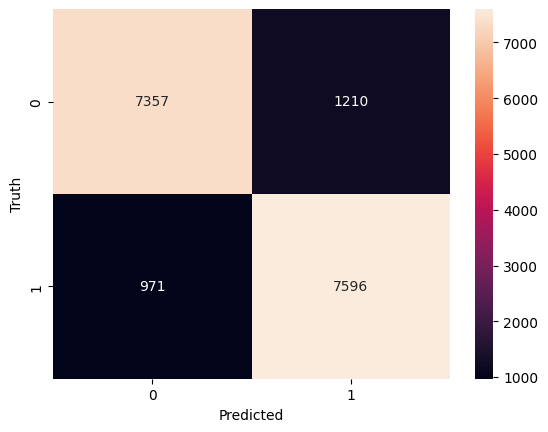

In [75]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8567
           1       0.86      0.89      0.87      8567

    accuracy                           0.87     17134
   macro avg       0.87      0.87      0.87     17134
weighted avg       0.87      0.87      0.87     17134



In [77]:
news = [
    'President Donald Trump indicated Saturday that he had spoken with the king of Jordan about potentially building housing and moving more than 1 million Palestinians from Gaza to neighboring countries, a remarkable proposal from a sitting US president.Trump said he asked Jordan’s Abdullah II, a key US partner in the region, to take in more Palestinians in a Saturday phone call.',
    'The Oval Office that President Donald Trump begrudgingly departed four years ago was reassembled in almost identical fashion over the course of a few hours Monday, right down to the cream wool rug with the olive branch border, designed by Nancy Reagan for her husband.',
    'American tech billionaire Elon Musk made a surprise address at the campaign launch for Germany’s Alternative for Germany (AfD) party as thousands of people gathered across the country to protest the rise of the far-right party.',
    'A breakthrough in [MASK] technology has allowed scientists to [MASK] human consciousness into robotic bodies, [MASK] a new era of possibilities',
    "A breakthrough in AI technology has allowed scientists to transfer human consciousness into robotic bodies, ushering a new era of possibilities."
]
model.predict(news)

1/1 [==============================] - 1s 1s/step


array([[0.8991039 ],
       [0.24647762],
       [0.78543866],
       [0.38210446],
       [0.37068474]], dtype=float32)